# Partie 1 : RNN avec numpy

In [249]:
# On importe les librairies nécessaires
import math
import numpy as np
import matplotlib.pyplot as plt

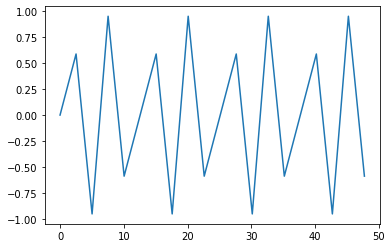

In [250]:
# Q1) On créé la fonction sinus
fe = 250
T_tot = 1
dt = 1/fe
f = 100
t = np.arange(0,T_tot+dt,dt)
X = 2*np.pi*f*t
Y = np.sin(X)

plt.plot(X[:20],Y[:20])

In [251]:
X_data = X[0:len(X)-1]
Y_data = X[1:len(X)]

In [252]:
# Q2) On explique les paramètres du modèle

# paramètres de la couche récurrente
Wh = np.array([[ 0.10044432],  [0.45918286], [-0.6911162],   [0.726187]  ])
Wh = Wh + np.random.random((4,1))
Uh = np.array([[-0.23220539, -0.9194568,  -0.23070683,  0.21783987],
                 [-0.5916439,   0.2684203,   0.21439475,  0.7293442 ],
                 [ 0.5075546,  -0.25638738,  0.7739852,   0.27856922],
                 [-0.58174425, -0.12967375,  0.54932344, -0.58566386]])
Uh = Uh +  np.random.random((4,4))
bh = np.array([[0.], [0.], [0.], [0.]])
bh = bh + np.random.random((4,1))

# paramètres de la couche connectée
Wy = np.array([0.55384743, -0.29551107, -0.07442117, 0.93942714])
Wy = Wy + np.random.random((1,4))
by = np.array(0.)
by = by + np.random.random(1)

In [253]:
print("Wh: weight matrix for weights between input and hidden layers {}".format(Wh.shape))
print("Uh: weight matrix for shared weights in the RNN layer (hidden layer){}".format(Uh.shape))
print("bh: bias vector for shared weights in the hidden layer{}".format(bh.shape))
print("Wy: weight matrix for weights between hidden and output layers{}".format(Wy.shape))
print("by: bias term for weights between hidden and output layer{}".format(by.shape))

Wh: weight matrix for weights between input and hidden layers (4, 1)
Uh: weight matrix for shared weights in the RNN layer (hidden layer)(4, 4)
bh: bias vector for shared weights in the hidden layer(4, 1)
Wy: weight matrix for weights between hidden and output layers(1, 4)
by: bias term for weights between hidden and output layer(1,)


In [254]:
# Q3) On écrit la passe avant pour la prédiction à partir du modèle donné
def forward(x,y, Wh, Uh, bh, Wy, by, prev_s):
    mulu = np.dot(Wh, x)
    mulw = np.dot(Uh, prev_s)
    add = mulw + mulu
    s = sigmoid(add)
    mulv = np.dot(Wy, s)
    prev_s = s
    output = np.tanh(mulv)
    return output, prev_s

# petite définition de la fonction sigmoid en numpy (à donner aux étudiants)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# initialisation au temps 0
prev_s = np.zeros((4, 1))  # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
loss = 0.0 
# on boucle sur les temps 1 à 9
T = len(X_data)
Y_res = [];
# do a forward pass to get prediction
for i in range(Y_data.shape[0]):
    x, y = X_data[i], Y_data[i]                    # get input, output values of each record
    output, prev_s = forward(x,y, Wh, Uh, bh, Wy, by, prev_s)
    Y_res.append(y)
    # calculate error 
    loss_per_record = (y - mulv)**2 / 2
    loss += loss_per_record
loss = loss/len(Y_data)

In [258]:
print("Loss: {}".format(loss.reshape(-1)[0]))

Loss: 65892.62170356762


In [63]:
#Il faut faire une retropropagation du gradient pour améliorer les résultats

## Partie 2 : RNN avec Keras

In [259]:
# On formate les données pour l'entrée du réseau RNN 
dataX = []
dataY = []
for i in range(len(Y)-1):
    dataX.append([Y[i]])
    dataY.append([Y[i+1]])    
dataX = np.array(dataX)
dataY = np.array(dataY)
dataY = np.reshape(dataY, (1,dataY.shape[0]))
dataX = np.reshape(dataX, (1,dataX.shape[0], dataX.shape[1]))

In [260]:
# Q5) 

# on importe les librairies nécessaires
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense

# On créé le réseau
# Subclassing
'''class MyFirstRNN(tf.keras.Model):
    
    def __init__(self):
        super(MyFirstRNN,self).__init__()
        self.rnn = SimpleRNN(units=4,return_sequences=True,batch_input_shape=dataX.shape,stateful=True)
        self.dense = Dense(1)
        
    def call(self, data):
        data = self.rnn(data)
        data = self.dense(data)
        return data
        
'''        
#Sequential
myFirstRNN = Sequential()
myFirstRNN.add(SimpleRNN(units=4,return_sequences=True,batch_input_shape=dataX.shape,stateful=True))
myFirstRNN.add(Dense(1))
# On compile le réseau
# ...
loss_obj = tf.keras.losses.mse
optimizer = tf.keras.optimizers.Adam()

myFirstRNN.compile(optimizer, loss_obj)
# on entraine le réseau
# ...
myFirstRNN.fit(dataX,dataY,epochs=1000,batch_size=1,shuffle=False)

Train on 1 samples
Epoch 1/1000
1/1 [==============================] - 1s 524ms/sample - loss: 0.5106
Epoch 2/1000
1/1 [==============================] - 0s 55ms/sample - loss: 0.5024
Epoch 3/1000
1/1 [==============================] - 0s 56ms/sample - loss: 0.4934
Epoch 4/1000
1/1 [==============================] - 0s 57ms/sample - loss: 0.4845
Epoch 5/1000
1/1 [==============================] - 0s 56ms/sample - loss: 0.4757
Epoch 6/1000
1/1 [==============================] - 0s 52ms/sample - loss: 0.4670
Epoch 7/1000
1/1 [==============================] - 0s 50ms/sample - loss: 0.4584
Epoch 8/1000
1/1 [==============================] - 0s 53ms/sample - loss: 0.4500
Epoch 9/1000
1/1 [==============================] - 0s 59ms/sample - loss: 0.4417
Epoch 10/1000
1/1 [==============================] - 0s 59ms/sample - loss: 0.4336
Epoch 11/1000
1/1 [==============================] - 0s 50ms/sample - loss: 0.4255
Epoch 12/1000
1/1 [==============================] - 0s 53ms/sample - loss: 

Epoch 100/1000
1/1 [==============================] - 0s 51ms/sample - loss: 0.0690
Epoch 101/1000
1/1 [==============================] - 0s 51ms/sample - loss: 0.0674
Epoch 102/1000
1/1 [==============================] - 0s 60ms/sample - loss: 0.0658
Epoch 103/1000
1/1 [==============================] - 0s 52ms/sample - loss: 0.0642
Epoch 104/1000
1/1 [==============================] - 0s 51ms/sample - loss: 0.0627
Epoch 105/1000
1/1 [==============================] - 0s 54ms/sample - loss: 0.0612
Epoch 106/1000
1/1 [==============================] - 0s 60ms/sample - loss: 0.0598
Epoch 107/1000
1/1 [==============================] - 0s 49ms/sample - loss: 0.0584
Epoch 108/1000
1/1 [==============================] - 0s 57ms/sample - loss: 0.0570
Epoch 109/1000
1/1 [==============================] - 0s 53ms/sample - loss: 0.0556
Epoch 110/1000
1/1 [==============================] - 0s 54ms/sample - loss: 0.0543
Epoch 111/1000
1/1 [==============================] - 0s 52ms/sample - loss:

Epoch 198/1000
1/1 [==============================] - 0s 53ms/sample - loss: 0.0051
Epoch 199/1000
1/1 [==============================] - 0s 53ms/sample - loss: 0.0049
Epoch 200/1000
1/1 [==============================] - 0s 55ms/sample - loss: 0.0048
Epoch 201/1000
1/1 [==============================] - 0s 55ms/sample - loss: 0.0047
Epoch 202/1000
1/1 [==============================] - 0s 60ms/sample - loss: 0.0045
Epoch 203/1000
1/1 [==============================] - 0s 53ms/sample - loss: 0.0044
Epoch 204/1000
1/1 [==============================] - 0s 51ms/sample - loss: 0.0043
Epoch 205/1000
1/1 [==============================] - 0s 56ms/sample - loss: 0.0042
Epoch 206/1000
1/1 [==============================] - 0s 48ms/sample - loss: 0.0041
Epoch 207/1000
1/1 [==============================] - 0s 60ms/sample - loss: 0.0039
Epoch 208/1000
1/1 [==============================] - 0s 55ms/sample - loss: 0.0038
Epoch 209/1000
1/1 [==============================] - 0s 54ms/sample - loss:

Epoch 294/1000
1/1 [==============================] - 0s 55ms/sample - loss: 4.4020e-04
Epoch 295/1000
1/1 [==============================] - 0s 48ms/sample - loss: 4.3012e-04
Epoch 296/1000
1/1 [==============================] - 0s 54ms/sample - loss: 4.2027e-04
Epoch 297/1000
1/1 [==============================] - 0s 54ms/sample - loss: 4.1066e-04
Epoch 298/1000
1/1 [==============================] - 0s 49ms/sample - loss: 4.0126e-04
Epoch 299/1000
1/1 [==============================] - 0s 53ms/sample - loss: 3.9209e-04
Epoch 300/1000
1/1 [==============================] - 0s 51ms/sample - loss: 3.8313e-04
Epoch 301/1000
1/1 [==============================] - 0s 55ms/sample - loss: 3.7438e-04
Epoch 302/1000
1/1 [==============================] - 0s 54ms/sample - loss: 3.6583e-04
Epoch 303/1000
1/1 [==============================] - 0s 51ms/sample - loss: 3.5748e-04
Epoch 304/1000
1/1 [==============================] - 0s 53ms/sample - loss: 3.4932e-04
Epoch 305/1000
1/1 [============

1/1 [==============================] - 0s 46ms/sample - loss: 4.7432e-05
Epoch 388/1000
1/1 [==============================] - 0s 57ms/sample - loss: 4.6228e-05
Epoch 389/1000
1/1 [==============================] - 0s 45ms/sample - loss: 4.5053e-05
Epoch 390/1000
1/1 [==============================] - 0s 56ms/sample - loss: 4.3905e-05
Epoch 391/1000
1/1 [==============================] - 0s 60ms/sample - loss: 4.2784e-05
Epoch 392/1000
1/1 [==============================] - 0s 51ms/sample - loss: 4.1690e-05
Epoch 393/1000
1/1 [==============================] - 0s 52ms/sample - loss: 4.0623e-05
Epoch 394/1000
1/1 [==============================] - 0s 53ms/sample - loss: 3.9579e-05
Epoch 395/1000
1/1 [==============================] - 0s 51ms/sample - loss: 3.8562e-05
Epoch 396/1000
1/1 [==============================] - 0s 49ms/sample - loss: 3.7568e-05
Epoch 397/1000
1/1 [==============================] - 0s 52ms/sample - loss: 3.6598e-05
Epoch 398/1000
1/1 [===========================

Epoch 481/1000
1/1 [==============================] - 0s 56ms/sample - loss: 3.4036e-06
Epoch 482/1000
1/1 [==============================] - 0s 53ms/sample - loss: 3.3017e-06
Epoch 483/1000
1/1 [==============================] - 0s 56ms/sample - loss: 3.2029e-06
Epoch 484/1000
1/1 [==============================] - 0s 54ms/sample - loss: 3.1065e-06
Epoch 485/1000
1/1 [==============================] - 0s 60ms/sample - loss: 3.0131e-06
Epoch 486/1000
1/1 [==============================] - 0s 53ms/sample - loss: 2.9222e-06
Epoch 487/1000
1/1 [==============================] - 0s 60ms/sample - loss: 2.8339e-06
Epoch 488/1000
1/1 [==============================] - 0s 56ms/sample - loss: 2.7481e-06
Epoch 489/1000
1/1 [==============================] - 0s 59ms/sample - loss: 2.6650e-06
Epoch 490/1000
1/1 [==============================] - 0s 53ms/sample - loss: 2.5843e-06
Epoch 491/1000
1/1 [==============================] - 0s 50ms/sample - loss: 2.5056e-06
Epoch 492/1000
1/1 [============

1/1 [==============================] - 0s 46ms/sample - loss: 1.6238e-07
Epoch 575/1000
1/1 [==============================] - 0s 59ms/sample - loss: 1.5681e-07
Epoch 576/1000
1/1 [==============================] - 0s 53ms/sample - loss: 1.5136e-07
Epoch 577/1000
1/1 [==============================] - 0s 54ms/sample - loss: 1.4609e-07
Epoch 578/1000
1/1 [==============================] - 0s 49ms/sample - loss: 1.4109e-07
Epoch 579/1000
1/1 [==============================] - 0s 53ms/sample - loss: 1.3623e-07
Epoch 580/1000
1/1 [==============================] - 0s 56ms/sample - loss: 1.3147e-07
Epoch 581/1000
1/1 [==============================] - 0s 53ms/sample - loss: 1.2689e-07
Epoch 582/1000
1/1 [==============================] - 0s 53ms/sample - loss: 1.2250e-07
Epoch 583/1000
1/1 [==============================] - 0s 54ms/sample - loss: 1.1819e-07
Epoch 584/1000
1/1 [==============================] - 0s 43ms/sample - loss: 1.1405e-07
Epoch 585/1000
1/1 [===========================

Epoch 668/1000
1/1 [==============================] - 0s 54ms/sample - loss: 4.7877e-09
Epoch 669/1000
1/1 [==============================] - 0s 60ms/sample - loss: 4.6018e-09
Epoch 670/1000
1/1 [==============================] - 0s 53ms/sample - loss: 4.4148e-09
Epoch 671/1000
1/1 [==============================] - 0s 50ms/sample - loss: 4.2481e-09
Epoch 672/1000
1/1 [==============================] - 0s 51ms/sample - loss: 4.0801e-09
Epoch 673/1000
1/1 [==============================] - 0s 54ms/sample - loss: 3.9249e-09
Epoch 674/1000
1/1 [==============================] - 0s 54ms/sample - loss: 3.7628e-09
Epoch 675/1000
1/1 [==============================] - 0s 52ms/sample - loss: 3.6140e-09
Epoch 676/1000
1/1 [==============================] - 0s 58ms/sample - loss: 3.4751e-09
Epoch 677/1000
1/1 [==============================] - 0s 50ms/sample - loss: 3.3333e-09
Epoch 678/1000
1/1 [==============================] - 0s 58ms/sample - loss: 3.2076e-09
Epoch 679/1000
1/1 [============

1/1 [==============================] - 0s 53ms/sample - loss: 9.7559e-11
Epoch 762/1000
1/1 [==============================] - 0s 56ms/sample - loss: 9.2420e-11
Epoch 763/1000
1/1 [==============================] - 0s 48ms/sample - loss: 8.8778e-11
Epoch 764/1000
1/1 [==============================] - 0s 52ms/sample - loss: 8.5984e-11
Epoch 765/1000
1/1 [==============================] - 0s 51ms/sample - loss: 8.2275e-11
Epoch 766/1000
1/1 [==============================] - 0s 59ms/sample - loss: 7.7489e-11
Epoch 767/1000
1/1 [==============================] - 0s 52ms/sample - loss: 7.5392e-11
Epoch 768/1000
1/1 [==============================] - 0s 54ms/sample - loss: 7.1976e-11
Epoch 769/1000
1/1 [==============================] - 0s 50ms/sample - loss: 6.8005e-11
Epoch 770/1000
1/1 [==============================] - 0s 53ms/sample - loss: 6.5066e-11
Epoch 771/1000
1/1 [==============================] - 0s 58ms/sample - loss: 6.2827e-11
Epoch 772/1000
1/1 [===========================

Epoch 855/1000
1/1 [==============================] - 0s 45ms/sample - loss: 2.9685e-12
Epoch 856/1000
1/1 [==============================] - 0s 61ms/sample - loss: 3.0586e-12
Epoch 857/1000
1/1 [==============================] - 0s 52ms/sample - loss: 2.8300e-12
Epoch 858/1000
1/1 [==============================] - 0s 53ms/sample - loss: 2.7394e-12
Epoch 859/1000
1/1 [==============================] - 0s 55ms/sample - loss: 2.5739e-12
Epoch 860/1000
1/1 [==============================] - 0s 53ms/sample - loss: 2.5670e-12
Epoch 861/1000
1/1 [==============================] - 0s 56ms/sample - loss: 2.5920e-12
Epoch 862/1000
1/1 [==============================] - 0s 51ms/sample - loss: 2.6004e-12
Epoch 863/1000
1/1 [==============================] - 0s 55ms/sample - loss: 2.4140e-12
Epoch 864/1000
1/1 [==============================] - 0s 56ms/sample - loss: 2.4374e-12
Epoch 865/1000
1/1 [==============================] - 0s 54ms/sample - loss: 2.5119e-12
Epoch 866/1000
1/1 [============

1/1 [==============================] - 0s 54ms/sample - loss: 7.3150e-13
Epoch 949/1000
1/1 [==============================] - 0s 46ms/sample - loss: 6.8862e-13
Epoch 950/1000
1/1 [==============================] - 0s 53ms/sample - loss: 6.9282e-13
Epoch 951/1000
1/1 [==============================] - 0s 53ms/sample - loss: 7.0487e-13
Epoch 952/1000
1/1 [==============================] - 0s 55ms/sample - loss: 7.0912e-13
Epoch 953/1000
1/1 [==============================] - 0s 55ms/sample - loss: 7.1340e-13
Epoch 954/1000
1/1 [==============================] - 0s 54ms/sample - loss: 7.0846e-13
Epoch 955/1000
1/1 [==============================] - 0s 60ms/sample - loss: 7.1277e-13
Epoch 956/1000
1/1 [==============================] - 0s 53ms/sample - loss: 6.4393e-13
Epoch 957/1000
1/1 [==============================] - 0s 53ms/sample - loss: 6.5185e-13
Epoch 958/1000
1/1 [==============================] - 0s 51ms/sample - loss: 6.6547e-13
Epoch 959/1000
1/1 [===========================

In [261]:
output = myFirstRNN.predict(dataX)

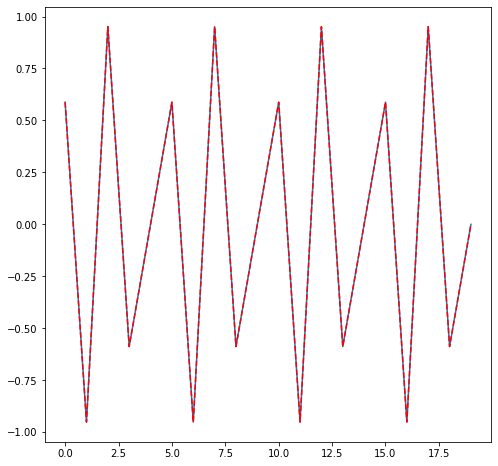

In [262]:
plt.figure(figsize=(8,8))
plt.plot(output.reshape(-1)[0:20])
plt.plot(dataY.reshape(-1)[0:20],'r--')
plt.show()